In [2]:
import tweepy
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
consumer_key = "yU8vEIoeuvA4Q6VGaTA1oKIJh"
consumer_secret = "oub3TL27N8KXkxtDdHddyS1kVbAnFLHmpBXTzmwKSJZbe9EhNS"
access_token = "1713221188108099584-WzXfcaK2QmuNrzI7GJVJ4UtZZ2Gpzu"
access_token_secret = "yMT52qIzGl79AENcU25LpQVeTrueXPupcC4NthYk7ykrz"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [1]:
pip install pytrends

In [5]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)
pytrends.trending_searches(pn='india')
trends = pytrends.trending_searches().head(10)
trends

,0
0,Chiefs
1,Bills
2,Josh Dobbs
3,Raiders
4,Tampa Bay Buccaneers
5,USC football
6,Eagles vs Cowboys
7,Real Madrid
8,Bass Reeves
9,Seahawks vs Ravens


In [7]:
df_trends = pd.DataFrame(trends)
df_trends.columns = ["Trends"]
df_trends

,Trends
0,Chiefs
1,Bills
2,Josh Dobbs
3,Raiders
4,Tampa Bay Buccaneers
5,USC football
6,Eagles vs Cowboys
7,Real Madrid
8,Bass Reeves
9,Seahawks vs Ravens


In [8]:
df_trends.insert(0, 'Rank', range(1, len(df_trends) + 1))
df_trends

,Rank,Trends
0,1,Chiefs
1,2,Bills
2,3,Josh Dobbs
3,4,Raiders
4,5,Tampa Bay Buccaneers
5,6,USC football
6,7,Eagles vs Cowboys
7,8,Real Madrid
8,9,Bass Reeves
9,10,Seahawks vs Ravens


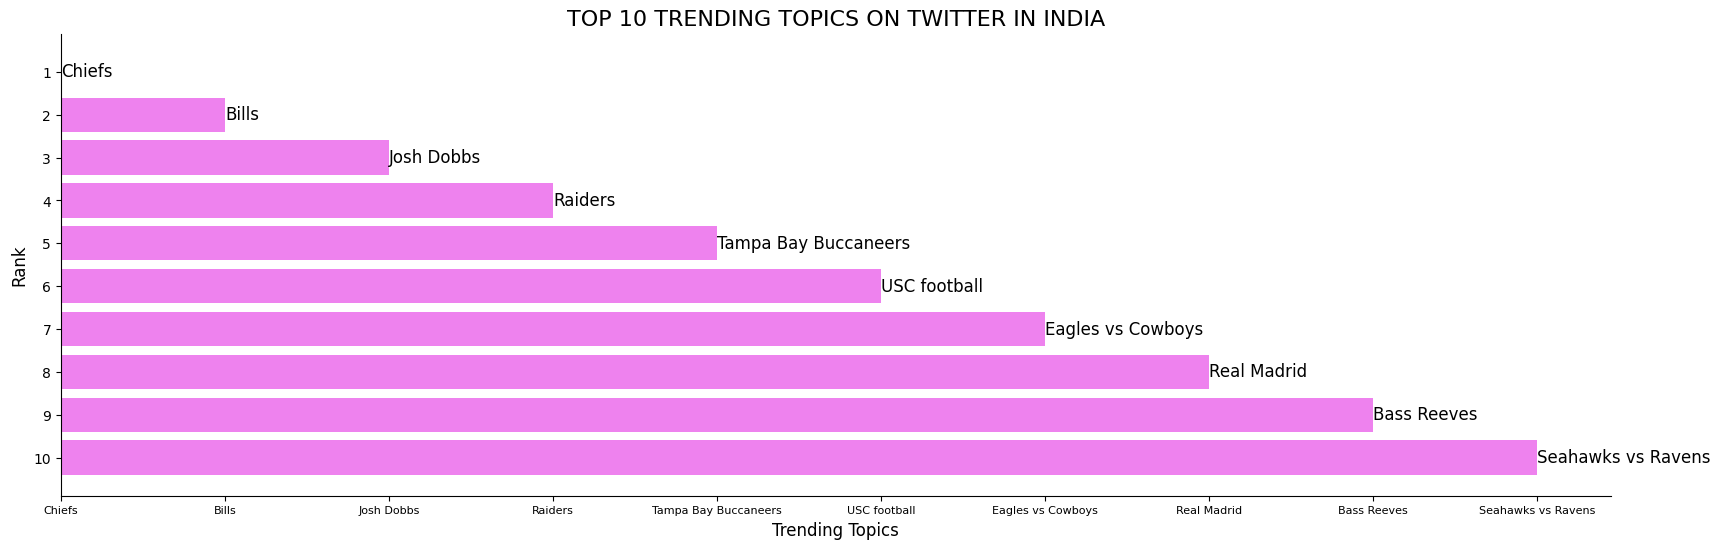

In [13]:
df_trends = df_trends.sort_values('Rank', ascending=True)

plt.figure(figsize=(20, 6))
plt.barh(df_trends['Rank'], df_trends['Trends'], align='center', color='violet')
plt.xlabel('Trending Topics', fontsize=12)
plt.ylabel('Rank', fontsize=12)
plt.title('TOP 10 TRENDING TOPICS ON TWITTER IN INDIA', fontsize=16)
plt.xticks(fontsize=8)
plt.yticks(df_trends['Rank'], fontsize=10)
plt.gca().invert_yaxis()

for i, j in enumerate(df_trends['Trends']):
    plt.text(j, df_trends['Rank'][i], str(j), color='black', fontsize=12, va='center')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

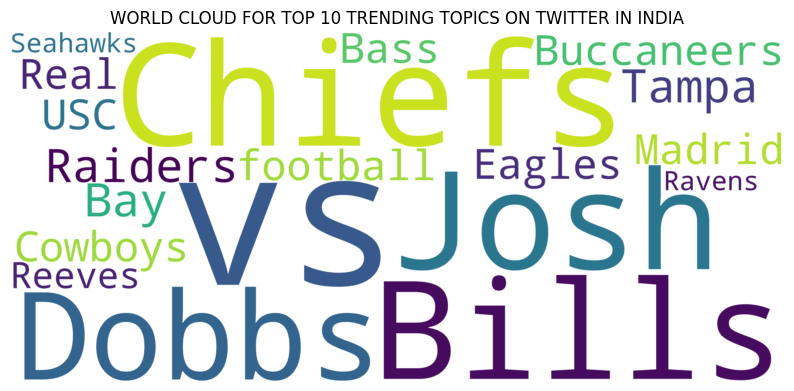

In [19]:
from wordcloud import WordCloud

text = " ".join(df_trends['Trends'])
wordcloud = WordCloud(width=4000, height=1800, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WORLD CLOUD FOR TOP 10 TRENDING TOPICS ON TWITTER IN INDIA")
plt.show()